In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle as pk
import scipy.linalg as sc
from MRPy import MRPy

In [3]:
with open('resources/data/sample_KM.pk','rb') as target:
    K1, M1, K2, M2, K3, M3 = pk.load(target)

In [6]:
def vibration_modes(K,M):

#uses scipy to solve the standard eigenvalue problem
    w2, Phi = sc.eig(K,M)
    
#ensure ascending order of eigenvalues:
    iw = w2.argsort()
    w2 = w2[iw]
    Phi = Phi[:,iw]
    
#eigenvalues to vibration frequencies
    wk = np.sqrt(np.real(w2))
    fk = wk/2/np.pi
    
    return fk,wk,Phi

## EXEMPLO 1:

In [40]:
fk1, wk1, Phi1 = vibration_modes(K1,M1)

Text(0.5, 0, 'x')

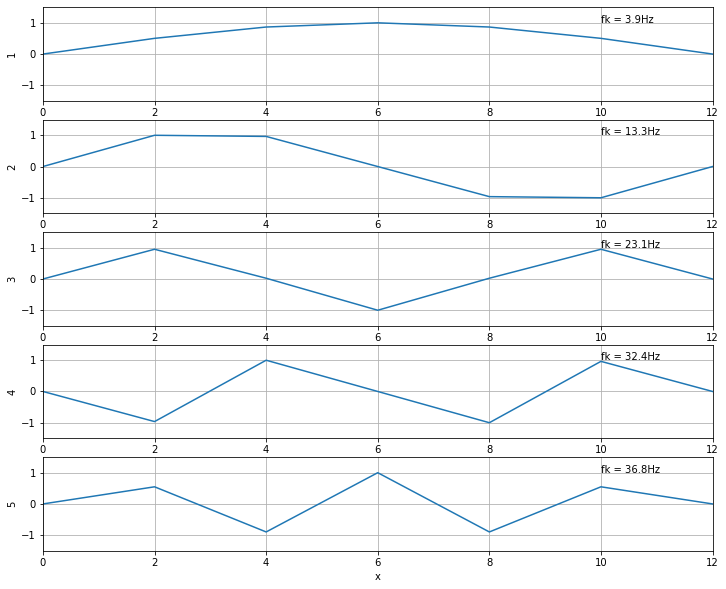

In [46]:
f1 = plt.figure(1, figsize=(12,10))
x = np.arange(0,14,2)

for k in range(5):
    qk = np.zeros(7)
    qk[1:-1] = Phi1[:,k]
    qk /= np.max(np.abs(qk))
    
    plt.subplot(5,1,k+1)
    plt.plot(x, qk)
    plt.xlim(0,12)
    plt.ylim(-1.5,1.5); plt.ylabel(str(k+1));
    plt.text(10,1,'fk = {0:3.1f}Hz'.format(fk1[k]))
    plt.grid(True)
    
plt.xlabel('x')

## EXEMPLO 3:

In [69]:
fk3, wk3, Phi3 = vibration_modes(K3, M3)
print("Primeira Frequência Natural: {0:1.2f}Hz  | {1:1.2f}rad/s".format(fk3[0],wk3[0]))
print("Segunda Frequência Natural:  {0:0.2f}Hz | {1:1.2f}rad/s".format(fk3[1],wk3[1]))
print("Terceira Frequência Natural: {0:0.2f}Hz | {1:1.2f}rad/s".format(fk3[2],wk3[2]))

print("\nAutovetores:")
print(np.round(Phi3[0],3))
print(np.round(Phi3[1],3))
print(np.round(Phi3[2],3))

Primeira Frequência Natural: 5.41Hz  | 34.02rad/s
Segunda Frequência Natural:  15.17Hz | 95.33rad/s
Terceira Frequência Natural: 21.92Hz | 137.76rad/s

Autovetores:
[ 0.737  0.591 -0.328]
[ 0.591 -0.328  0.737]
[ 0.328 -0.737 -0.591]


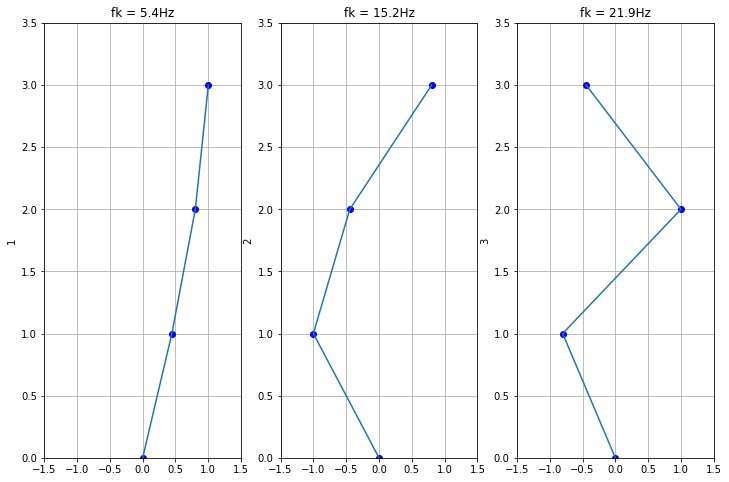

In [83]:
f3 = plt.figure(3, figsize=(12,8))
x = np.arange(4)

for k in range(3):
    qk = np.zeros(4)
    qk[1:] = Phi3[::-1,k]
    qk /= np.max(np.abs(qk))
    
    plt.subplot(1,3,k+1)
    plt.plot(qk,x,'bo')
    plt.plot(qk,x)
    
    plt.xlim(-1.5, 1.5)
    plt.ylabel(str(k+1))
    plt.ylim( 0.0, 3.5)
    plt.title('fk = {0:3.1f}Hz'.format(fk3[k]))
    plt.grid(1)

In [109]:
u0 = np.array([[0.050, 0.000, 0.000]]).T
v0 = np.array([[0.000, 0.000, 0.000]]).T

Mi = np.dot(np.dot(Phi3.T, M3), Phi3)       # Modal Mass
Mi = np.diag(Mi)

qMu0 = np.dot(np.dot(Phi3.T,M3),u0)
qMv0 = np.dot(np.dot(Phi3.T,M3),v0)

thi = np.zeros_like(Mi)
u0i = np.zeros_like(Mi)

for k in range(3):

# If there are initial displacements only
#   thi[k] = -np.pi/2
#   u0i[k] =  qMu0[k]/Mi[k]/np.sin(thi[k])

# If there are initial velocities only
    thi[k] =  np.arctan(wk3[k]*qMu0[k]/qMv0[k])
    u0i[k] =  qMv0[k]/Mi[k]/np.cos(thi[k])/wk3[k]
        
    print('Mode {0} with phase {1:5.2f}rad and amplitude {2:6.2f}mm'.format(k+1, thi[k], 1000*u0i[k]))

Mode 1 with phase  1.57rad and amplitude   0.00mm
Mode 2 with phase  1.57rad and amplitude   0.00mm
Mode 3 with phase -1.57rad and amplitude   0.00mm


C:\Users\Gabriel\AppData\Local\Temp/ipykernel_3808/391380555.py:20: RuntimeWarning: divide by zero encountered in true_divide
  thi[k] =  np.arctan(wk3[k]*qMu0[k]/qMv0[k])


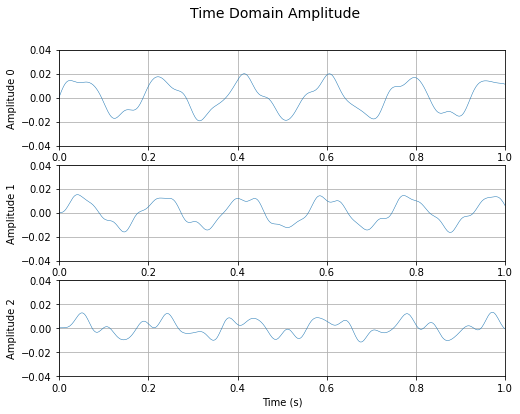

In [103]:
# Build the modal responses as harmonic functions with given properties
uk = MRPy.harmonic(NX=3, N=2048, fs=512, X0=u0i, f0=fk3, phi=thi)

#uk.plot_time(4, figsize=(8,6), axis_t=(0, 1, -0.005, 0.005))

# Calculate the NODAL responses superposing all modal responses
uN = MRPy(np.dot(Phi3, uk), fs=512)

f4 = uN.plot_time(4, figsize=(8,6), axis_t=(0, 1, -0.04, 0.04))

[ 5.41499969 15.17249196 21.92488612]


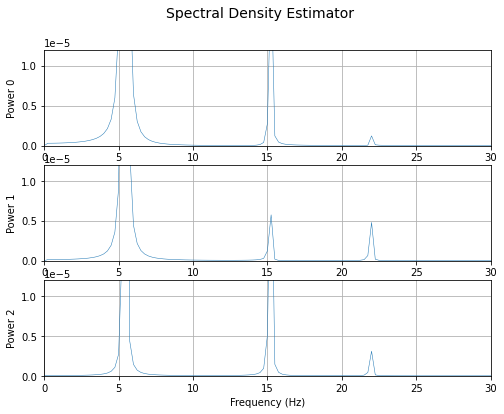

In [106]:
f5 = uN.plot_freq(5, figsize=(8,6), axis_f=(0, 30, 0.0, 1.2e-5))

print(fk3)